#install important packages

In [1]:
!pip install tensorflow  pandas numpy matplotlib nltk
!pip install scikit-learn


#import python packages

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import io
import nltk
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalAveragePooling1D,Flatten, Dropout , GRU
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv1D, MaxPool1D
from glob import glob


#Read dataset as json file

In [3]:
import json

# Specify the exact file you want to read
file_path = 'sample_data/json-fixer.json'  # Replace with your actual file name

datasets = []  # Initialize an empty list to store the dataset

# Read the specific JSON file
try:
    with open(file_path, 'r') as f:
        dataset = json.load(f)  # Load the JSON data from the file
        datasets.append(dataset)  # Append the dataset to the list
        print(f"Successfully loaded dataset from {file_path}")
except FileNotFoundError:
    print(f"File not found: {file_path}")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON from {file_path}: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# Now `datasets` contains the loaded dataset from the specified file


Successfully loaded dataset from sample_data/json-fixer.json


In [4]:
def processing_json_dataset(dataset):
  tags = []
  inputs = []
  responses={}
  for intent in dataset['intents']:
    responses[intent['intent']]=intent['responses']
    for lines in intent['text']:
      inputs.append(lines)
      tags.append(intent['intent'])
  return [tags, inputs, responses]

In [5]:
tags = []
inputs = []
responses={}

for dataset in datasets:

    [tags_list, inputs_list, responses_dict] = processing_json_dataset(dataset)
    tags=tags+tags_list
    inputs=inputs+inputs_list
    responses.update(responses_dict)


#dataset as DataFrame

In [6]:
dataset = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [7]:
dataset.tail()

,inputs,tags
110,How do therapists classify the type of persona...,counseling-fundamentals
111,I keep having these random thoughts that I don...,counseling-fundamentals
112,I keep having these random thoughts that I don...,counseling-fundamentals
113,I keep having these random thoughts that I don...,counseling-fundamentals
114,I keep having these random thoughts that I don...,counseling-fundamentals


In [8]:
dataset = dataset.sample(frac=1)

In [9]:
dataset.head()

,inputs,tags
39,I am so angry. I feel like the arguments with ...,intimacy
89,My therapist is gay so there are no sexual iss...,human-sexuality
24,It's been almost a year since my ex-boyfriend ...,relationship-dissolution
80,How does a counselor decide when to end counse...,stress
13,My daughter seemed to be developing at a norma...,parenting


#Pre-processing text of dataset

In [10]:
import string
dataset['inputs'] = dataset['inputs'].apply(lambda sequence:
                                            [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])

In [11]:
dataset.head()

,inputs,tags
39,"[i, , a, m, , s, o, , a, n, g, r, y, , i, ...",intimacy
89,"[m, y, , t, h, e, r, a, p, i, s, t, , i, s, ...",human-sexuality
24,"[i, t, s, , b, e, e, n, , a, l, m, o, s, t, ...",relationship-dissolution
80,"[h, o, w, , d, o, e, s, , a, , c, o, u, n, ...",stress
13,"[m, y, , d, a, u, g, h, t, e, r, , s, e, e, ...",parenting


In [12]:
dataset['inputs'] = dataset['inputs'].apply(lambda wrd: ''.join(wrd))

In [13]:
dataset.head()

,inputs,tags
39,i am so angry i feel like the arguments with m...,intimacy
89,my therapist is gay so there are no sexual iss...,human-sexuality
24,its been almost a year since my exboyfriend br...,relationship-dissolution
80,how does a counselor decide when to end counse...,stress
13,my daughter seemed to be developing at a norma...,parenting


In [14]:


import pickle

# Assuming `dataset` contains 'inputs' and 'tags'
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(dataset['inputs'])
train = tokenizer.texts_to_sequences(dataset['inputs'])
features = pad_sequences(train)

# Save the Tokenizer as a .pkl file
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)
    print("Successfully saved tokenizer to 'tokenizer.pkl'")

# Create and fit the LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(dataset['tags'])

# Save the LabelEncoder as a .pkl file
with open('label_encoder.pkl', 'wb') as label_encoder_file:
    pickle.dump(le, label_encoder_file)
    print("Successfully saved label encoder to 'label_encoder.pkl'")


Successfully saved tokenizer to 'tokenizer.pkl'
Successfully saved label encoder to 'label_encoder.pkl'


In [15]:
len(features[0])

313

In [16]:
input_shape = features.shape[1]
print(input_shape)

313


In [17]:
features.shape

(115, 313)

In [18]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  1178
output length:  23


In [19]:
tokenizer.word_index

{'i': 1,
 'to': 2,
 'and': 3,
 'a': 4,
 'my': 5,
 'he': 6,
 'me': 7,
 'the': 8,
 'with': 9,
 'it': 10,
 'of': 11,
 'that': 12,
 'but': 13,
 'have': 14,
 'is': 15,
 'in': 16,
 'for': 17,
 'she': 18,
 'this': 19,
 'im': 20,
 'him': 21,
 'was': 22,
 'how': 23,
 'her': 24,
 'been': 25,
 'know': 26,
 'not': 27,
 'do': 28,
 'so': 29,
 'about': 30,
 'dont': 31,
 'get': 32,
 'never': 33,
 'can': 34,
 'am': 35,
 'like': 36,
 'what': 37,
 'ive': 38,
 'we': 39,
 'or': 40,
 'want': 41,
 'when': 42,
 'out': 43,
 'has': 44,
 'just': 45,
 'because': 46,
 'now': 47,
 'on': 48,
 'years': 49,
 'be': 50,
 'his': 51,
 'think': 52,
 'feel': 53,
 'no': 54,
 'up': 55,
 'really': 56,
 'things': 57,
 'always': 58,
 'at': 59,
 'help': 60,
 'one': 61,
 'are': 62,
 'had': 63,
 'our': 64,
 'having': 65,
 'wanted': 66,
 'back': 67,
 'they': 68,
 'told': 69,
 'then': 70,
 'as': 71,
 'time': 72,
 'there': 73,
 'times': 74,
 'after': 75,
 'if': 76,
 'relationship': 77,
 'thoughts': 78,
 'myself': 79,
 'stop': 80,
 'al

#RNN MODEL

## Build RNN Model

In [20]:

# BI LSTM
m= tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocabulary + 1, 100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, dropout=0.2)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(output_length, activation='softmax')
])


In [21]:
m.layers

[<Embedding name=embedding, built=False>,
 <Bidirectional name=bidirectional, built=False>,
 <Dense name=dense, built=False>,
 <Dropout name=dropout, built=False>,
 <Dense name=dense_1, built=False>]

In [23]:
glove_dir = "sample_data/glove.6B.100d.txt"
embeddings_index = {}

with open(glove_dir, 'r', encoding='utf-8') as file_:
    for line in file_:
        arr = line.strip().split()  # Strip leading/trailing whitespace before splitting
        single_word = arr[0]
        values = arr[1:]

        # Check if the length of the values matches the expected 100 dimensions
        if len(values) != 100:
            print(f"Skipping line: {line[:50]}... (malformed data)")
            continue

        # Convert to float32
        w = np.asarray(values, dtype='float32')
        embeddings_index[single_word] = w

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [25]:
max_words = vocabulary + 1
word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words,100)).astype(object)
for word , i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [26]:
import numpy as np
import tensorflow as tf
import pickle  # Import pickle for saving GloVe embeddings
import os

# Load GloVe embeddings
glove_dir = "sample_data/glove.6B.100d.txt"
embeddings_index = {}

# Load GloVe file
with open(glove_dir, 'r', encoding='utf-8') as file_:
    for line in file_:
        arr = line.strip().split()  # Strip leading/trailing whitespace before splitting
        single_word = arr[0]
        values = arr[1:]

        # Ensure you have the correct dimensionality
        if len(values) != 100:
            print(f"Skipping line: {line[:50]}... (malformed data)")
            continue

        # Convert to float32 and store in embeddings_index
        w = np.asarray(values, dtype='float32')
        embeddings_index[single_word] = w

# Save the embeddings index as a .pkl file
with open('glove_embeddings.pkl', 'wb') as embeddings_file:
    pickle.dump(embeddings_index, embeddings_file)
    print("Successfully saved GloVe embeddings to 'glove_embeddings.pkl'")

# Prepare the embedding matrix
vocabulary_size = len(word_index) + 1  # Adjust this based on your vocabulary size
embedding_dim = 100  # GloVe vector dimension
embedding_matrix = np.zeros((vocabulary_size, embedding_dim))

for word, i in word_index.items():  # Assuming you have a mapping of words to indices
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Define the model
m = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False),  # Load pre-trained weights
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, dropout=0.2)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(output_length, activation='softmax')
])

# The embedding layer should now have weights initialized
print(m.summary())


Successfully saved GloVe embeddings to 'glove_embeddings.pkl'


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │         117,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,900 (460.55 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 117,900 (460.55 KB)

None


In [27]:
# Assuming 'm' is your model and the first layer is the Embedding layer
# Make the Embedding layer trainable before setting weights:
m.layers[0].trainable = True  # Change the index to 0 to target the Embedding layer
m.layers[0].set_weights([embedding_matrix])
m.layers[0].trainable = False  # Optionally, set it back to False after setting weights

In [28]:
m.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [29]:
m.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │         117,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,900 (460.55 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 117,900 (460.55 KB)

In [30]:
from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'loss', patience = 200, mode = 'min', restore_best_weights = True)

In [31]:
from sklearn.metrics import f1_score
import numpy as np

class F1ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val):
        self.X_val = X_val
        self.y_val = y_val
        self.f1_scores = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.X_val)
        y_pred = np.argmax(y_pred, axis=1)
        f1 = f1_score(self.y_val, y_pred, average='weighted')
        self.f1_scores.append(f1)
        print(f'F1 score: {f1}')

# create the callback and pass it to the fit method
f1_callback = F1ScoreCallback(features, labels)
history = m.fit(features, labels, epochs=60, batch_size=64, callbacks=[earlyStopping, f1_callback])


Epoch 1/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step
F1 score: 0.029728725380899292
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.0556 - loss: 3.1457  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 374ms/step
F1 score: 0.09566315327184892
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.0452 - loss: 3.1046
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step
F1 score: 0.12301667549392523
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.0834 - loss: 3.0859   
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step
F1 score: 0.2328197165153687
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.1674 - loss: 3.0243   
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step
F1 score: 0.2188937077928752
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.1286 - loss: 3.0195
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step
F1 score: 0.27481727209988077
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.1338 - loss: 3.0038   
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 390ms/step
F1 score: 0.2811260694555889
2/2 ━━━━━━

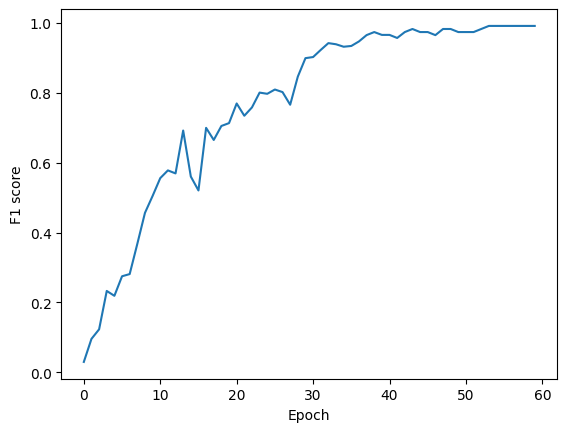

In [32]:
import matplotlib.pyplot as plt

plt.plot(f1_callback.f1_scores)
plt.xlabel('Epoch')
plt.ylabel('F1 score')
plt.show()


In [33]:
from sklearn.metrics import roc_auc_score

y_pred = m.predict(features)
y_true_onehot = tf.keras.utils.to_categorical(labels)

roc_auc = roc_auc_score(y_true_onehot, y_pred, multi_class='ovo')
print(f'ROC AUC score: {roc_auc}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step
ROC AUC score: 0.9995256916996047


In [34]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from scipy.stats import ks_2samp
from keras.callbacks import EarlyStopping

# Assuming features and labels are already defined
# Split dataset into training and validation sets
# Assign a value to test_size, for example 0.2 for a 20% test split
test_size = 0.2
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=test_size)

In [35]:
# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train your model on the training set
m.fit(X_train, y_train, epochs=60, batch_size=32, callbacks=[earlyStopping])

# Predict the probabilities of the validation set instances belonging to the positive class
y_pred = m.predict(X_val)[:, 1]

# Calculate the empirical CDF of predicted probabilities and true labels
y_pred_sorted = np.sort(y_pred)
y_val_sorted = np.sort(y_val)
cdf_pred = np.linspace(0, 1, len(y_pred), endpoint=True)
cdf_true = np.linspace(0, 1, len(y_val), endpoint=True)

# Calculate the KS statistic
ks_stat, p_value = ks_2samp(cdf_pred, cdf_true)

# Set KS threshold and maximum number of retraining iterations
ks_threshold = 0.1
max_iterations = 5
iterations = 0

# Track the best KS statistic
best_ks_stat = ks_stat

while ks_stat < ks_threshold and iterations < max_iterations:
    # Retrain the model with additional epochs or adjust the model architecture
    print(f"Iteration {iterations+1}: KS stat = {ks_stat}, Retraining model...")
    m.fit(X_train, y_train, epochs=5, batch_size=32)

    # Recalculate predictions and KS statistic
    y_pred = m.predict(X_val)[:, 1]
    y_pred_sorted = np.sort(y_pred)
    cdf_pred = np.linspace(0, 1, len(y_pred), endpoint=True)
    ks_stat, p_value = ks_2samp(cdf_pred, cdf_true)

    # Track best KS statistic
    if ks_stat > best_ks_stat:
        best_ks_stat = ks_stat

    iterations += 1

# Print the final KS statistic and the number of iterations
print(f"Final KS stat = {ks_stat} after {iterations} iterations")


Epoch 1/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 863ms/step - accuracy: 0.9416 - loss: 0.2862
Epoch 2/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 764ms/step - accuracy: 0.9112 - loss: 0.3328
Epoch 3/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 739ms/step - accuracy: 0.9361 - loss: 0.3033
Epoch 4/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 745ms/step - accuracy: 0.9455 - loss: 0.2624
Epoch 5/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.9774 - loss: 0.2918
Epoch 6/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 749ms/step - accuracy: 0.9151 - loss: 0.3067
Epoch 7/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 759ms/step - accuracy: 0.9518 - loss: 0.2577
Epoch 8/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 756ms/step - accuracy: 0.9557 - loss: 0.2742
Epoch 9/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 747ms/step - accuracy: 0.9533 - loss: 0.2489
Epoch 10/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9494 - loss: 0.2272
Epoch 11/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 743ms/step - accuracy: 0.9377 - loss: 0.2354
Epoch 12/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 753ms/step - accuracy: 0.8979 - loss: 0.

In [36]:
m.save_weights("sample_data/model.weights.h5") # Change the filename to end with .weights.h5

In [37]:
import matplotlib as mpl
def draw_plot(data, type_data):
  mpl.style.use('seaborn')
  plt.figure(figsize = (25, 5))
  plt.plot(data,'darkorange', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel(type_data)
  plt.legend()

<ipython-input-37-9446446f8df0>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


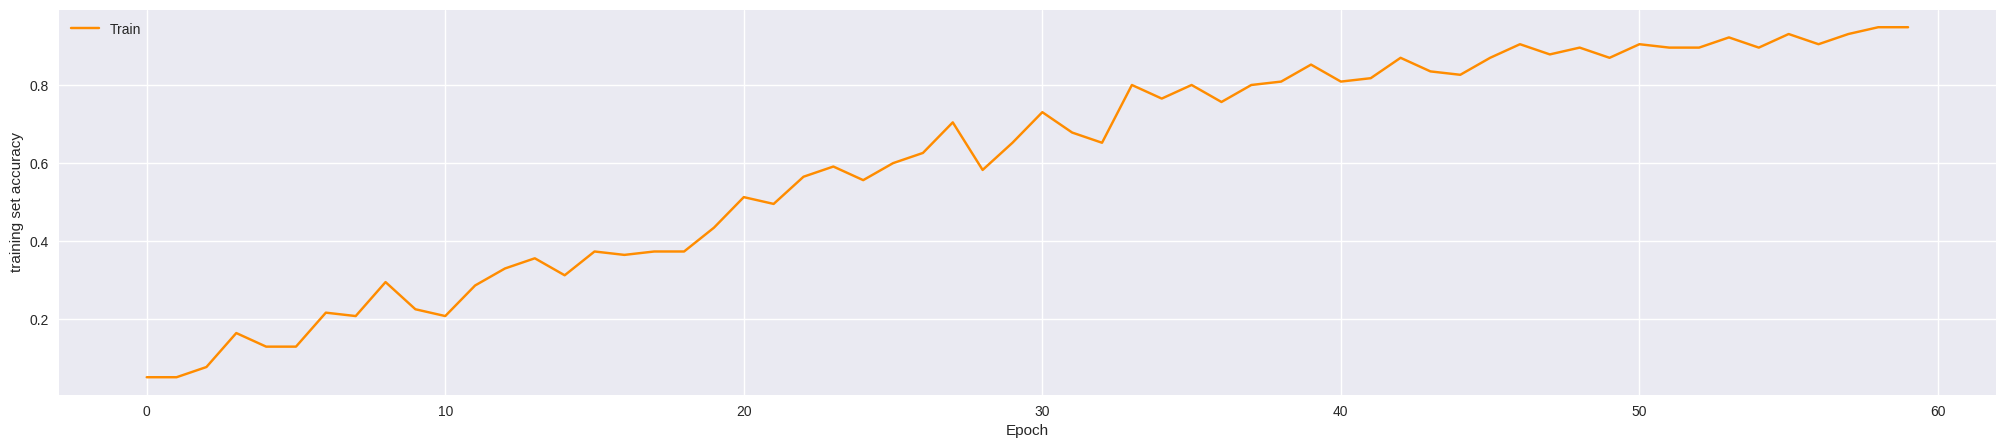

In [38]:
draw_plot(history.history['accuracy'],'training set accuracy' )

<ipython-input-37-9446446f8df0>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


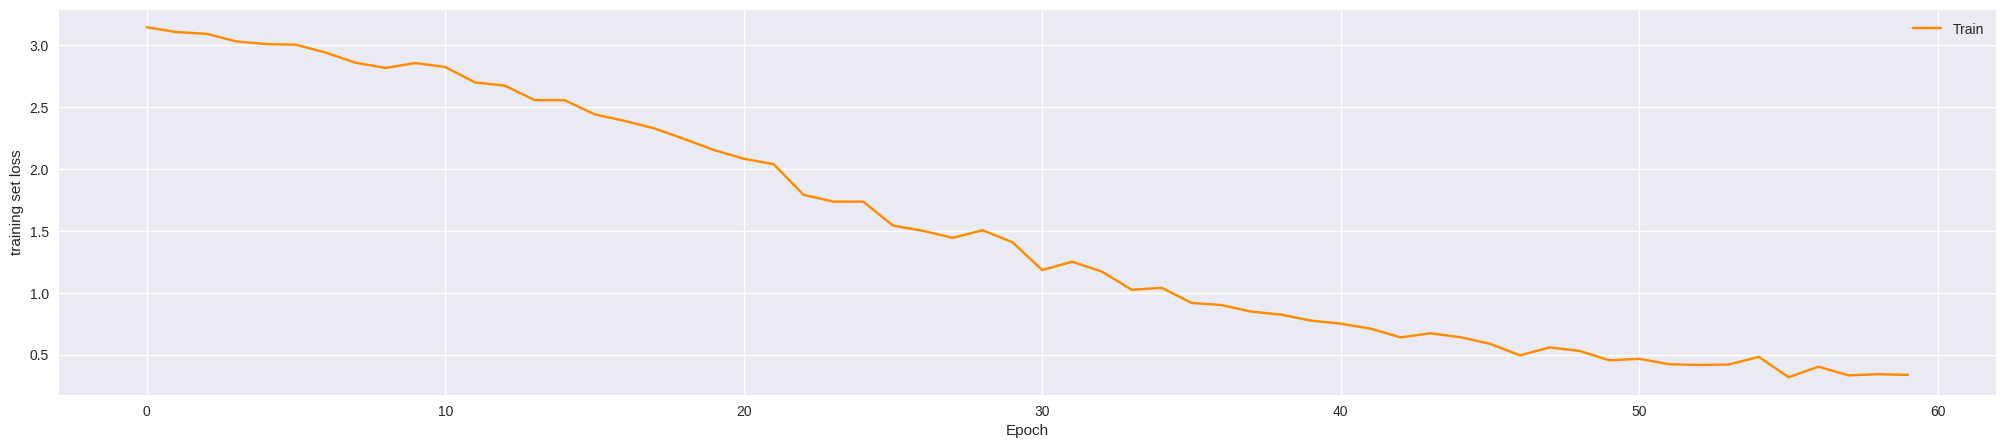

In [39]:
draw_plot(history.history['loss'],'training set loss' )

In [40]:
m.evaluate(features, labels, batch_size = 64)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step - accuracy: 0.9554 - loss: 0.1394


[0.13314026594161987, 0.95652174949646]

## Testing

In [41]:
import random
def generate_answer(query):
  texts = []
  pred_input = query
  pred_input = [letters.lower() for letters in pred_input if letters not in string.punctuation]
  pred_input = ''.join(pred_input)
  texts.append(pred_input)
  pred_input = tokenizer.texts_to_sequences(texts)
  pred_input = np.array(pred_input).reshape(-1)
  pred_input = pad_sequences([pred_input],input_shape)
  output = m.predict(pred_input)
  print(output[0][output.argmax()])
  if (output[0][output.argmax()]) < 0.7 :
    return "I cant help you with this ", "INVALID"
  output = output.argmax()

  response_tag = le.inverse_transform([output])[0]
  return random.choice(responses[response_tag]),response_tag

In [42]:
list_que = ["hello", "can u tell me what is the mental health?","i want to sucide..",
            "I want to die..i cannot learn that school subject",
            "how to cure cough", "please help me","I'm unemployed just relocated", "i am suffering from depression ","I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n   How can I change my feeling of being worthless to everyone?"]
for i in list_que:
  print("you: {}".format(i))
  #res_tag, intent = generate_answer(i)
  print(generate_answer(i))

you: hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
0.12116019
('I cant help you with this ', 'INVALID')
you: can u tell me what is the mental health?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
0.7014581
("Hi...let's start with what's causing you to sneak out of the house?Understanding the motivation behind your actions (in this case...your sneaking out at night) can often times help you create the change you want. Â\xa0Are you arguing with your parents? Do you feel misunderstood? Alone? Scared? Stressed out? What are you doing once you leave the house? Where are you going? Are people in your home in conflict? Do you feel safer when you leave? Most importantly, reflect on what may be behind the reason for your wanting to leave the house and feeling not in control of your actions? Â\xa0Talk to someone about what's going on, because maybe that person could help you create the movement you are seeking.", 'behavioral-change')
you: i want to sucide..
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
0.5353417